In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor

from micropyome.taxa import regression
from micropyome.datasets import normalize

In [2]:
DATASET_PATH = "data/averill_processed/bacteria/"

In [5]:
X = {}
Y = {}
for level in regression.TAXONOMIC_LEVELS:
    x = pd.read_csv(f"{DATASET_PATH}{level}/15_variables.csv")
    if level == 'fg':
        y = pd.read_csv(f"{DATASET_PATH}{level}/observed.csv")
    else:
        y = pd.read_csv(f"{DATASET_PATH}{level}/y_11groupTaxo.csv")

    x = x.drop(x.columns[0], axis=1)
    x = normalize(x)
    y = y.drop(y.columns[0], axis=1)

    X[level] = x
    Y[level] = y

In [28]:
class LogitRegression(LinearRegression):

    def fit(self, x, p):
        p = np.asarray(p)
        y = np.log(p / (1 - p))
        y = np.nan_to_num(y, nan=0)
        return super().fit(x, y)

    def predict(self, x):
        y = super().predict(x)
        return 1 / (np.exp(-y) + 1)

In [29]:
models = {
    "k-NN": KNeighborsRegressor(20),
    "Logit": LogitRegression(),
    "Linear Regression": LinearRegression(),
}

In [30]:
results = regression.train_evaluate_models_multiple_taxa(models, X, Y, threshold=0.006, k_fold=5)

2024-06-07T17:29:50.655148 > INFO Evaluating 3 models with 5 splits.
2024-06-07T17:29:50.656532 > INFO Level: fg
2024-06-07T17:29:50.664019 > INFO K-fold split: 0
2024-06-07T17:29:50.683362 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:50.777677 > INFO K-fold split: 1
2024-06-07T17:29:50.783186 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:50.884732 > INFO K-fold split: 2
2024-06-07T17:29:50.891279 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:51.029326 > INFO K-fold split: 3
2024-06-07T17:29:51.033359 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:51.128366 > INFO K-fold split: 4
2024-06-07T17:29:51.132648 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:51.264155 > INFO Level: phylum
2024-06-07T17:29:51.268560 > INFO K-fold split: 0
2024-06-07T17:29:51.275259 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:51.363438 > INFO K-fold split: 1
2024-06-07T17:29:51.364766 > INFO Beginning the evaluatio

C:\Users\vince\AppData\Local\Temp\ipykernel_22988\1590540893.py:5: RuntimeWarning: invalid value encountered in log
  y = np.log(p / (1 - p))


2024-06-07T17:29:51.922992 > INFO K-fold split: 1
2024-06-07T17:29:51.924849 > INFO Beginning the evaluation of 3 models.


C:\Users\vince\AppData\Local\Temp\ipykernel_22988\1590540893.py:5: RuntimeWarning: invalid value encountered in log
  y = np.log(p / (1 - p))


2024-06-07T17:29:52.000894 > INFO K-fold split: 2
2024-06-07T17:29:52.004502 > INFO Beginning the evaluation of 3 models.


C:\Users\vince\AppData\Local\Temp\ipykernel_22988\1590540893.py:5: RuntimeWarning: invalid value encountered in log
  y = np.log(p / (1 - p))


2024-06-07T17:29:52.104965 > INFO K-fold split: 3
2024-06-07T17:29:52.114057 > INFO Beginning the evaluation of 3 models.


C:\Users\vince\AppData\Local\Temp\ipykernel_22988\1590540893.py:5: RuntimeWarning: invalid value encountered in log
  y = np.log(p / (1 - p))


2024-06-07T17:29:52.205046 > INFO K-fold split: 4
2024-06-07T17:29:52.213064 > INFO Beginning the evaluation of 3 models.


C:\Users\vince\AppData\Local\Temp\ipykernel_22988\1590540893.py:5: RuntimeWarning: invalid value encountered in log
  y = np.log(p / (1 - p))


2024-06-07T17:29:52.363017 > INFO Level: order
2024-06-07T17:29:52.366115 > INFO K-fold split: 0
2024-06-07T17:29:52.369698 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:52.464656 > INFO K-fold split: 1
2024-06-07T17:29:52.469316 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:52.536834 > INFO K-fold split: 2
2024-06-07T17:29:52.543927 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:52.625712 > INFO K-fold split: 3
2024-06-07T17:29:52.633258 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:52.698719 > INFO K-fold split: 4
2024-06-07T17:29:52.703139 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:52.735398 > INFO Level: family
2024-06-07T17:29:52.737294 > INFO K-fold split: 0
2024-06-07T17:29:52.741988 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:52.793986 > INFO K-fold split: 1
2024-06-07T17:29:52.801338 > INFO Beginning the evaluation of 3 models.
2024-06-07T17:29:52.848331 > INFO K-fold split: 2
2

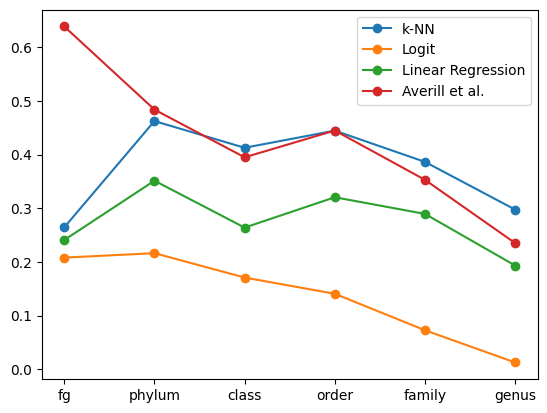

In [31]:
x = list(range(len(regression.TAXONOMIC_LEVELS)))

for model in models:
    y = [results[level][model] for level in regression.TAXONOMIC_LEVELS]
    plt.plot(x, y, "-o", label=model)

averill_results = pd.read_csv(f"{DATASET_PATH}/r2_published_results.csv")
published_results = averill_results.iloc[0].to_list()[1:]
plt.plot(x, published_results, "-o", label="Averill et al.")
plt.xticks(x, regression.TAXONOMIC_LEVELS)
plt.legend()
plt.show()

In [34]:
for r in results:
    print(results[r]["Linear Regression"])

0.24080773679564343
0.35139456767900157
0.2639362964397623
0.32053744989166433
0.2894566815787616
0.19315538017743064
